In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Asus\\Downloads\\amazon_alexa_review.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
for i in df.select_dtypes(include='float64').columns:
    df[i].fillna(df[i].median(),inplace=True)

for i in df.select_dtypes(include='int64').columns:
    df[i].fillna(df[i].median(),inplace=True)

for i in df.select_dtypes(include='object').columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [9]:
df['Dependents'].replace('3+', 3, inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

In [10]:
df['Dependents'].unique()

array([0, 1, 2, 3])

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB


In [13]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

for i in df.select_dtypes(include='float64').columns:
    df[i] = ms.fit_transform(df[[i]])

for i in df.select_dtypes(include='int64').columns:
    df[i] = ms.fit_transform(df[[i]])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 60.1+ KB


In [15]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,0.064978,0.038910,0.197905,0.706005,0.855049
std,1.009623,0.075560,0.070229,0.121718,0.137668,0.352339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000
50%,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000
75%,1.000000,0.069821,0.055134,0.225398,0.743590,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.select_dtypes(include='object').columns:
    df[i]=le.fit_transform(df[i])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(8)
memory usage: 43.3 KB


In [18]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,0.064978,0.038910,0.197905,0.706005,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,0.075560,0.070229,0.121718,0.137668,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


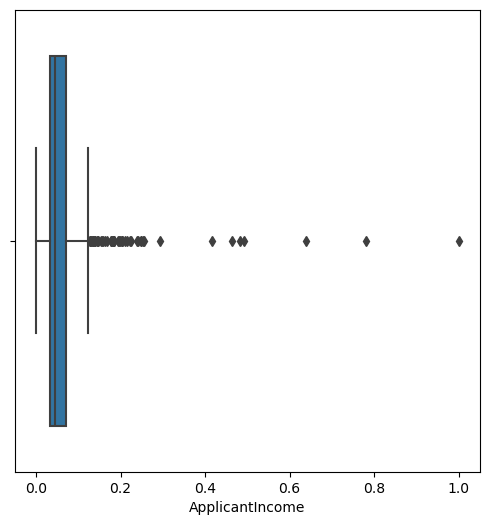

C:\Users\Asus\AppData\Local\Temp\ipykernel_1492\3407063831.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


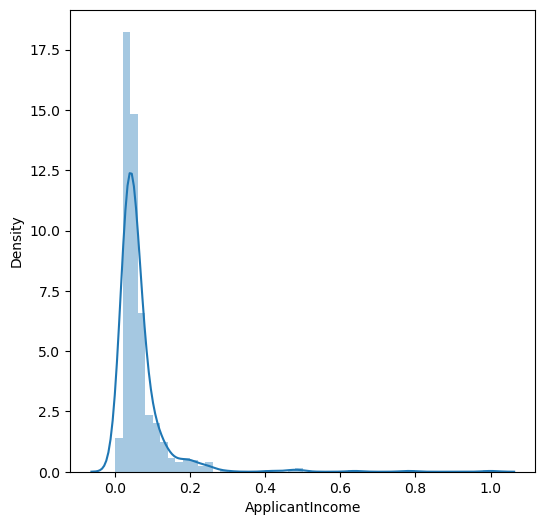

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.boxplot(x='ApplicantIncome', data=df)
plt.show()

plt.figure(figsize=(6,6))
sns.distplot(df['ApplicantIncome'])
plt.show()

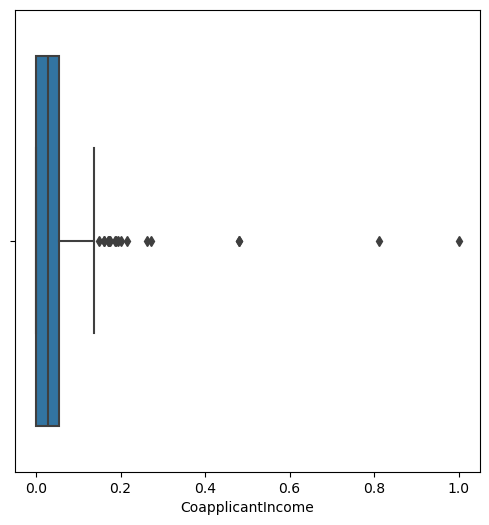

C:\Users\Asus\AppData\Local\Temp\ipykernel_1492\1425772514.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


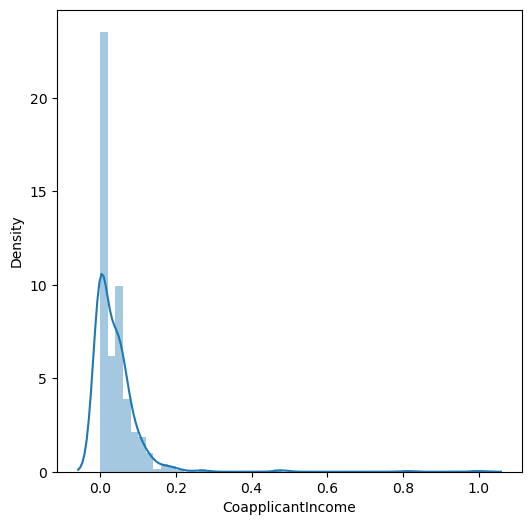

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x='CoapplicantIncome', data=df)
plt.show()

# tail is long in distribution plot
plt.figure(figsize=(6,6))
sns.distplot(df['CoapplicantIncome'])
plt.show()

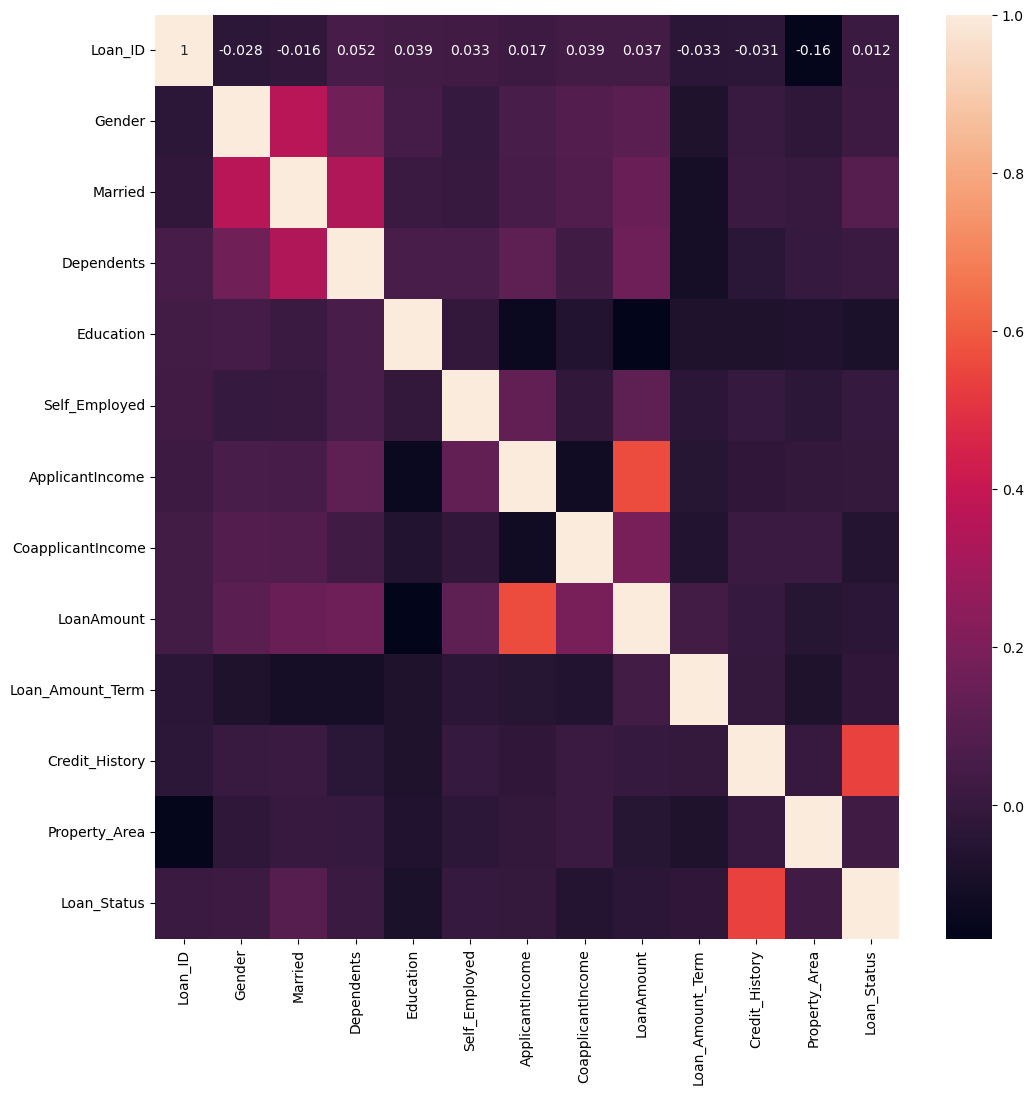

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [22]:
q1=df['ApplicantIncome'].quantile(0.25)
q3=df['ApplicantIncome'].quantile(0.75)
print(q1, q3)

0.033735312306740886 0.06982065553494124


In [23]:
IQR = (q3) - (q1)
min =(q1) - (1.5 *IQR)
max =(q3) + (1.5 *IQR)
print(min, max)

-0.020392702535559644 0.12394867037724178


In [24]:
df=df[df['ApplicantIncome']<=max]

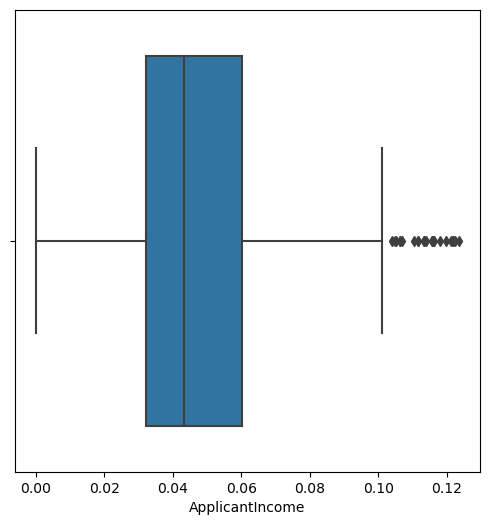

C:\Users\Asus\AppData\Local\Temp\ipykernel_1492\1975082324.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


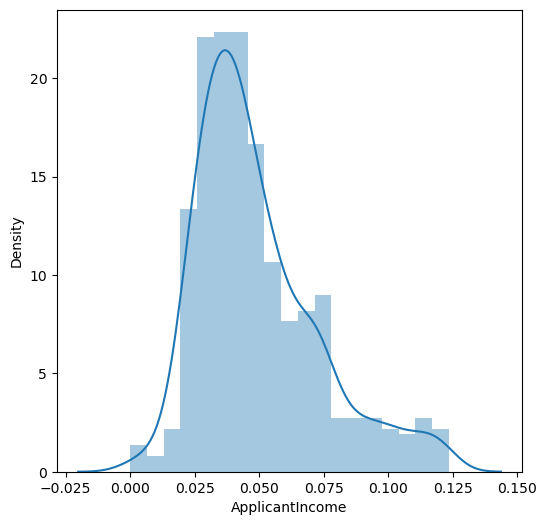

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(x='ApplicantIncome', data=df)
plt.show()

plt.figure(figsize=(6,6))
sns.distplot(df['ApplicantIncome'])
plt.show()

In [26]:
df['ApplicantIncome'].describe()

count    564.000000
mean       0.049162
std        0.023834
min        0.000000
25%        0.032084
50%        0.043148
75%        0.060118
max        0.123550
Name: ApplicantIncome, dtype: float64

In [27]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)
print(q1, q3)

0.0 0.0560875512995896


In [28]:
IQR = (q3) - (q1)
min =(q1) - (1.5 *IQR)
max =(q3) + (1.5 *IQR)
print(min, max)

-0.08413132694938441 0.140218878248974


In [29]:
df=df[df['CoapplicantIncome']<=max]

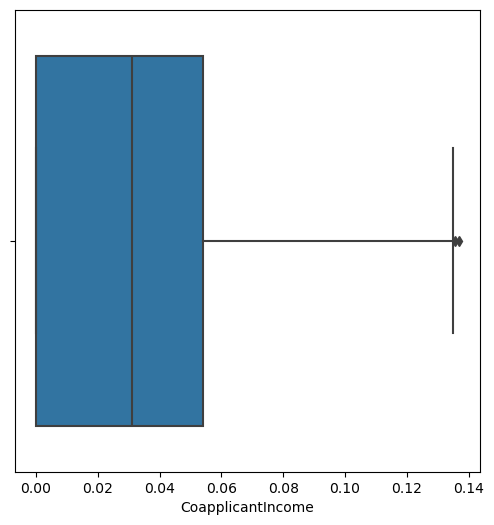

C:\Users\Asus\AppData\Local\Temp\ipykernel_1492\100442650.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


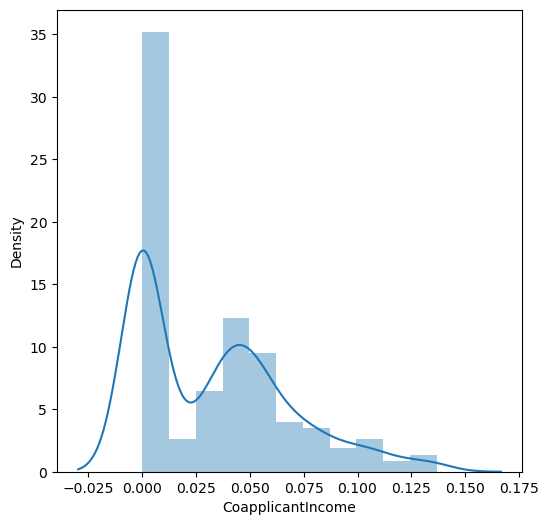

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x='CoapplicantIncome', data=df)
plt.show()

plt.figure(figsize=(6,6))
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [31]:
df['CoapplicantIncome'].describe()

count    548.000000
mean       0.032626
std        0.034997
min        0.000000
25%        0.000000
50%        0.031044
75%        0.054000
max        0.136823
Name: CoapplicantIncome, dtype: float64

In [32]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,305.757299,0.815693,0.649635,0.720803,0.239051,0.116788,0.049214,0.032626,0.175835,0.707327,0.855839,1.020073,0.693431
std,177.382898,0.388088,0.477520,0.997513,0.426894,0.321461,0.023592,0.034997,0.074624,0.138325,0.351573,0.786982,0.461490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.032390,0.000000,0.131693,0.743590,1.000000,0.000000,0.000000
50%,305.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.043364,0.031044,0.167873,0.743590,1.000000,1.000000,1.000000
75%,457.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.059988,0.054000,0.211288,0.743590,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.123550,0.136823,0.531114,1.000000,1.000000,2.000000,1.000000


In [33]:
df['Loan_Status'].value_counts()

Loan_Status
1    380
0    168
Name: count, dtype: int64

In [34]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [36]:
print('Performance of the model :- ' ,nb_model.score(X_test,y_test)*100, '%')

Performance of the model :-  81.81818181818183 %


In [37]:
y_pred = nb_model.predict(X_test)

In [38]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
277,1,1,0,0,0,0.036524,0.031200,0.102750,0.743590,1.0,2
84,1,1,1,0,0,0.047471,0.000000,0.059334,0.487179,1.0,2
275,1,1,1,0,0,0.032158,0.044208,0.153401,0.743590,1.0,1
392,1,1,0,0,0,0.030093,0.050760,0.160637,0.743590,1.0,2
537,1,0,2,0,0,0.042882,0.000000,0.141823,0.743590,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
46,1,1,1,0,0,0.068015,0.000000,0.050651,0.743590,1.0,2
396,0,0,0,0,0,0.037477,0.000000,0.089725,0.743590,0.0,2
208,1,0,0,0,0,0.028806,0.000000,0.072359,0.743590,1.0,2
200,1,1,1,1,0,0.030303,0.060000,0.117221,0.743590,1.0,1


In [39]:
y_test

277    1
84     1
275    1
392    1
537    1
      ..
46     1
396    0
208    1
200    1
225    0
Name: Loan_Status, Length: 165, dtype: int32

In [40]:
nb_model.predict([[1,1,0,0,0,0.036524,0.031200,0.102750,0.743590,1.0,2]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [42]:
print("Accuracy:- ", accuracy*100,'%')

Accuracy:-  81.81818181818183 %


In [43]:
print("Confusion Matrix:- ")
print(conf_matrix)

Confusion Matrix:- 
[[ 26  29]
 [  1 109]]


In [44]:
print("Classifiaction Report:- ")
print(class_report)

Classifiaction Report:- 
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        55
           1       0.79      0.99      0.88       110

    accuracy                           0.82       165
   macro avg       0.88      0.73      0.76       165
weighted avg       0.85      0.82      0.80       165



In [45]:
print('ROC_AUC SCORE:- ', roc_auc*100,'%')

ROC_AUC SCORE:-  73.18181818181819 %
